In [ ]:
import pandas as pd
stockprice_data = pd.read_csv("/content/HistoricalData_1624843559994.csv",parse_dates=["Date"],index_col="Date")
headlines_data = pd.read_csv("/content/Labeled_headlines.csv")

In [ ]:
stockprice_data.head()

,Close/Last,Volume,Open,High,Low
Date,,,,,
2021-06-25,$133.11,70783750,$133.46,$133.89,$132.81
2021-06-24,$133.41,68711000,$134.45,$134.64,$132.93
2021-06-23,$133.7,60214200,$133.77,$134.32,$133.23
2021-06-22,$133.98,74783620,$132.13,$134.08,$131.62
2021-06-21,$132.3,79663320,$130.3,$132.41,$129.21


In [ ]:
headlines_data.head()

,Unnamed: 0,Date,Vader_label,Headlines
0,0,2015-01-01,1,What Can We Expect From Apple Inc. In 2015? 1 ...
1,1,2015-02-01,1,What to expect from Apple in 2015 beyond its s...
2,2,2015-03-01,1,Mountie: An inexpensive and innovative way to ...
3,3,2015-04-01,0,"Donald Yacktman on the Sources of Moats, His C..."
4,4,2015-05-01,1,"SIM-free iPhone 6, 6 Plus reportedly debuting ..."


# **Length of each dataset:**

In [ ]:
print("(",len(stockprice_data),",",len(headlines_data),")")

( 2516 , 2351 )


# **Checking any Missing values:**

In [ ]:
stockprice_data.isna().any()

Close/Last    False
Volume        False
Open          False
High          False
Low           False
dtype: bool

In [ ]:
headlines_data.isna().any()

Unnamed: 0     False
Date           False
Vader_label    False
Headlines      False
dtype: bool

# **Stock Price Data**

In [ ]:
stockprice_data = stockprice_data.drop_duplicates()
stockprice_data = stockprice_data.filter(["Date","Close/Last","Open","High","Low","Volume"])
stockprice_data['Close/Last']= stockprice_data['Close/Last'].str.replace('$',"")
stockprice_data['Open']= stockprice_data['Open'].str.replace('$',"")
stockprice_data['Open']= stockprice_data['Open'].str.replace('$',"")
stockprice_data['High']= stockprice_data['High'].str.replace('$',"")
stockprice_data['Low']= stockprice_data['Low'].str.replace('$',"")
stockprice_data['Close/Last'] = stockprice_data['Close/Last'].astype(float)
stockprice_data['Open'] = stockprice_data['Open'].astype(float)
stockprice_data['High'] = stockprice_data['High'].astype(float)
stockprice_data['Low'] = stockprice_data['Low'].astype(float)
stockprice_data = stockprice_data.sort_index(ascending = True,axis = 0)
stockprice_data

,Close/Last,Open,High,Low,Volume
Date,,,,,
2011-06-28,11.9736,11.9161,12.0250,11.9086,293471803
2011-06-29,11.9300,12.0014,12.0132,11.8529,352493819
2011-06-30,11.9882,11.9536,12.0046,11.8871,322746911
2011-07-01,12.2593,11.9982,12.2679,11.9357,439705664
2011-07-05,12.4796,12.2500,12.4939,12.2321,354701618
...,...,...,...,...,...
2021-06-21,132.3000,130.3000,132.4100,129.2100,79663320
2021-06-22,133.9800,132.1300,134.0800,131.6200,74783620
2021-06-23,133.7000,133.7700,134.3200,133.2300,60214200


# **Headlines Data**

In [ ]:
headlines_data = headlines_data.drop_duplicates()
headlines_data["Date"] = pd.to_datetime(headlines_data["Date"]).dt.normalize()
headlines_data["Date"] = headlines_data.filter(["Date","Vader_label","Headlines"])
headlines_data = headlines_data.groupby(["Date"])["Headlines"].apply(lambda x : ','.join(x)).reset_index()
headlines_data.set_index("Date",inplace = True)
headlines_data = headlines_data.sort_index(ascending = True,axis = 0)
headlines_data

,Headlines
Date,
2015-01-01,What Can We Expect From Apple Inc. In 2015? 1 ...
2015-01-02,"Apple Loop: iOS 8.1.3 Angers Users, Outlook Ar..."
2015-01-03,"Samsung Launches Two New Smartphones, Mobile W..."
2015-01-04,Apple Daily: Retina MacBook Unboxing Video; Ap...
2015-01-05,"Apple Watch interest described as &quot;tepid,..."
...,...
2021-12-02,Facebook is building a smartwatch and wants to...
2021-12-03,How to cancel an Apple One subscription once y...
2021-12-04,Microsoft Boosts Conversational AI with $19.7 ...


# **Combining Both Price and Headlines data**

In [ ]:
stock_data = pd.concat([stockprice_data,headlines_data],axis = 1)
stock_data.dropna(axis = 0,inplace = True)
stock_data

,Close/Last,Open,High,Low,Volume,Headlines
Date,,,,,,
2015-01-02,27.3325,27.8475,27.8600,26.8375,212575080.0,"Apple Loop: iOS 8.1.3 Angers Users, Outlook Ar..."
2015-01-05,26.5625,27.0725,27.1625,26.3525,256843520.0,"Apple Watch interest described as &quot;tepid,..."
2015-01-06,26.5650,26.6350,26.8575,26.1575,262729000.0,Apple&quot;s TV Service Delayed: Getting Local...
2015-01-07,26.9375,26.8000,27.0500,26.6737,159933400.0,Apple Inc. leaks new iPod colors in iTunes 12....
2015-01-08,27.9725,27.3075,28.0375,27.1750,236675040.0,Nomura Begins Coverage on Apple (AAPL) IBM cou...
...,...,...,...,...,...,...
2021-06-17,131.7900,129.8000,132.5500,129.6500,96721670.0,Apple awards grants for computer chip courses ...
2021-06-18,130.4600,130.7100,131.5100,130.2400,108953300.0,Wells Fargo updates on its best-ideas 'Signatu...
2021-06-21,132.3000,130.3000,132.4100,129.2100,79663320.0,Apple is shortening new free TV Plus trials fr...


# **Calculating Sentiment Scores**

In [ ]:
stock_data["compound"] = ' '
stock_data["negative"] = ' '
stock_data["neutral"] = ' '
stock_data["positive"] = ' '
stock_data.head()

,Close/Last,Open,High,Low,Volume,Headlines,compound,negative,neutral,positive
Date,,,,,,,,,,
2015-01-02,27.3325,27.8475,27.8600,26.8375,212575080.0,"Apple Loop: iOS 8.1.3 Angers Users, Outlook Ar...",,,,
2015-01-05,26.5625,27.0725,27.1625,26.3525,256843520.0,"Apple Watch interest described as &quot;tepid,...",,,,
2015-01-06,26.5650,26.6350,26.8575,26.1575,262729000.0,Apple&quot;s TV Service Delayed: Getting Local...,,,,
2015-01-07,26.9375,26.8000,27.0500,26.6737,159933400.0,Apple Inc. leaks new iPod colors in iTunes 12....,,,,
2015-01-08,27.9725,27.3075,28.0375,27.1750,236675040.0,Nomura Begins Coverage on Apple (AAPL) IBM cou...,,,,


In [ ]:
import nltk
from nltk.sentiment import SentimentAnalyzer
from nltk.sentiment.util import *
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import unicodedata
#nltk.download('vader_lexicon')

sid = SentimentIntensityAnalyzer()
stock_data["compound"] = stock_data["Headlines"].apply(lambda x : sid.polarity_scores(x)['compound'])
stock_data["negative"] = stock_data["Headlines"].apply(lambda x : sid.polarity_scores(x)['neg'])
stock_data["neutral"] = stock_data["Headlines"].apply(lambda x : sid.polarity_scores(x)['neu'])
stock_data["positive"] = stock_data["Headlines"].apply(lambda x : sid.polarity_scores(x)['pos'])
stock_data.head()

,Close/Last,Open,High,Low,Volume,Headlines,compound,negative,neutral,positive
Date,,,,,,,,,,
2015-01-02,27.3325,27.8475,27.8600,26.8375,212575080.0,"Apple Loop: iOS 8.1.3 Angers Users, Outlook Ar...",0.1943,0.116,0.749,0.135
2015-01-05,26.5625,27.0725,27.1625,26.3525,256843520.0,"Apple Watch interest described as &quot;tepid,...",0.9748,0.061,0.831,0.107
2015-01-06,26.5650,26.6350,26.8575,26.1575,262729000.0,Apple&quot;s TV Service Delayed: Getting Local...,0.9932,0.034,0.862,0.105
2015-01-07,26.9375,26.8000,27.0500,26.6737,159933400.0,Apple Inc. leaks new iPod colors in iTunes 12....,0.9866,0.059,0.812,0.129
2015-01-08,27.9725,27.3075,28.0375,27.1750,236675040.0,Nomura Begins Coverage on Apple (AAPL) IBM cou...,0.4939,0.059,0.827,0.114


# **Rearranging the combined data**

In [ ]:
stock_data.drop(["Headlines"],inplace = True,axis = 1)
stock_data = stock_data[["Close/Last","compound","negative","neutral","positive","Open","High","Low","Volume"]]
stock_data.head()

,Close/Last,compound,negative,neutral,positive,Open,High,Low,Volume
Date,,,,,,,,,
2015-01-02,27.3325,0.1943,0.116,0.749,0.135,27.8475,27.8600,26.8375,212575080.0
2015-01-05,26.5625,0.9748,0.061,0.831,0.107,27.0725,27.1625,26.3525,256843520.0
2015-01-06,26.5650,0.9932,0.034,0.862,0.105,26.6350,26.8575,26.1575,262729000.0
2015-01-07,26.9375,0.9866,0.059,0.812,0.129,26.8000,27.0500,26.6737,159933400.0
2015-01-08,27.9725,0.4939,0.059,0.827,0.114,27.3075,28.0375,27.1750,236675040.0


In [ ]:
stock_data.to_csv("Stock_Data.csv")

# **Reading Stock_Data.csv file**

In [ ]:
stock_data = pd.read_csv("Stock_Data.csv",index_col = False)
stock_data.set_index("Date",inplace = True)
stock_data.head()

,Close/Last,compound,negative,neutral,positive,Open,High,Low,Volume
Date,,,,,,,,,
2015-01-02,27.3325,0.1943,0.116,0.749,0.135,27.8475,27.8600,26.8375,212575080.0
2015-01-05,26.5625,0.9748,0.061,0.831,0.107,27.0725,27.1625,26.3525,256843520.0
2015-01-06,26.5650,0.9932,0.034,0.862,0.105,26.6350,26.8575,26.1575,262729000.0
2015-01-07,26.9375,0.9866,0.059,0.812,0.129,26.8000,27.0500,26.6737,159933400.0
2015-01-08,27.9725,0.4939,0.059,0.827,0.114,27.3075,28.0375,27.1750,236675040.0


In [ ]:
stock_data.shape

(1572, 9)

In [ ]:
stock_data.isna().any()

Close/Last    False
compound      False
negative      False
neutral       False
positive      False
Open          False
High          False
Low           False
Volume        False
dtype: bool

In [ ]:
stock_data.describe(include = 'all')

,Close/Last,compound,negative,neutral,positive,Open,High,Low,Volume
count,1572.000000,1572.000000,1572.000000,1572.000000,1572.000000,1572.000000,1572.000000,1572.000000,1.572000e+03
mean,52.757512,0.687622,0.056559,0.840871,0.102578,52.736527,53.303948,52.170137,1.434821e+08
std,31.046798,0.613453,0.029974,0.038343,0.031456,31.067818,31.486742,30.589117,7.060129e+07
min,22.585000,-0.999500,0.000000,0.666000,0.000000,22.500000,22.917500,22.367500,4.544820e+07
25%,30.256250,0.840150,0.037000,0.819000,0.081000,30.238125,30.452500,30.033125,9.499015e+07
50%,42.525000,0.979650,0.051500,0.845000,0.101000,42.556250,42.931250,42.216250,1.257883e+08
75%,56.717500,0.994225,0.070000,0.866000,0.121000,56.582500,57.091250,56.058125,1.705695e+08
max,143.160000,0.999800,0.241000,0.954000,0.242000,143.600000,145.090000,141.370000,6.475300e+08


In [ ]:
stock_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1572 entries, 2015-01-02 to 2021-06-23
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Close/Last  1572 non-null   float64
 1   compound    1572 non-null   float64
 2   negative    1572 non-null   float64
 3   neutral     1572 non-null   float64
 4   positive    1572 non-null   float64
 5   Open        1572 non-null   float64
 6   High        1572 non-null   float64
 7   Low         1572 non-null   float64
 8   Volume      1572 non-null   float64
dtypes: float64(9)
memory usage: 122.8+ KB


# **Applying EDA to Stock Data**

Text(0, 0.5, 'Close Price (in $)')

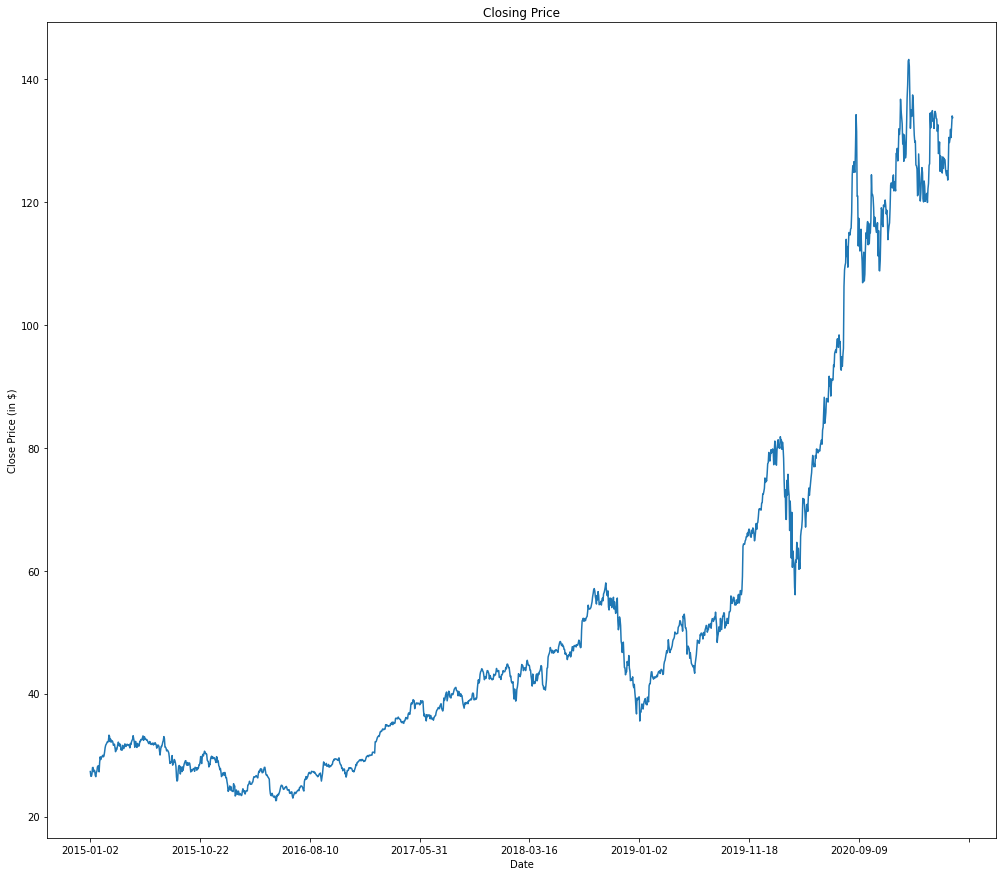

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize = (17,15))
stock_data["Close/Last"].plot()
plt.title("Closing Price")
plt.xlabel("Date")
plt.ylabel("Close Price (in $)")

In [ ]:
stock_data.rolling(10).mean().head(25)

,Close/Last,compound,negative,neutral,positive,Open,High,Low,Volume
Date,,,,,,,,,
2015-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


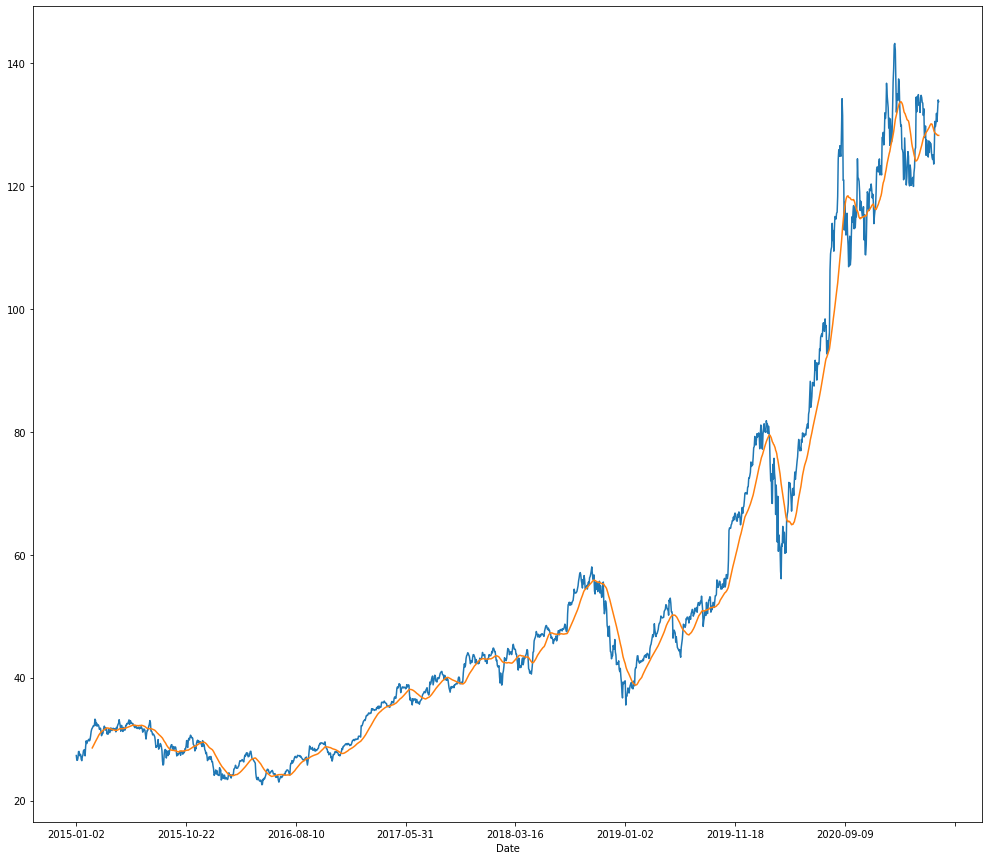

In [ ]:
plt.figure(figsize = (17,15))
stock_data["Close/Last"].plot()
stock_data.rolling(window = 30).mean()["Close/Last"].plot()

In [ ]:
stock_data

,Close/Last,compound,negative,neutral,positive,Open,High,Low,Volume
Date,,,,,,,,,
2015-01-02,27.3325,0.1943,0.116,0.749,0.135,27.8475,27.8600,26.8375,212575080.0
2015-01-05,26.5625,0.9748,0.061,0.831,0.107,27.0725,27.1625,26.3525,256843520.0
2015-01-06,26.5650,0.9932,0.034,0.862,0.105,26.6350,26.8575,26.1575,262729000.0
2015-01-07,26.9375,0.9866,0.059,0.812,0.129,26.8000,27.0500,26.6737,159933400.0
2015-01-08,27.9725,0.4939,0.059,0.827,0.114,27.3075,28.0375,27.1750,236675040.0
...,...,...,...,...,...,...,...,...,...
2021-06-17,131.7900,0.9899,0.067,0.816,0.117,129.8000,132.5500,129.6500,96721670.0
2021-06-18,130.4600,0.9825,0.038,0.869,0.093,130.7100,131.5100,130.2400,108953300.0
2021-06-21,132.3000,0.9972,0.029,0.856,0.115,130.3000,132.4100,129.2100,79663320.0


# **Data Modelling**

In [ ]:
data = int(1.0*(len(stock_data)-1))
split = int(data*0.8)
total_data = len(stock_data)
start = total_data - data
print("Number of records in training data : ",split)
print("Number of records in testing data : ",total_data - split)

Number of records in training data :  1256
Number of records in testing data :  316


In [ ]:
close_price = stock_data.iloc[start:total_data,0]
compound = stock_data.iloc[start:total_data,1]
negative = stock_data.iloc[start:total_data,2]
neutral = stock_data.iloc[start:total_data,3]
positive = stock_data.iloc[start:total_data,4]
open_price = stock_data.iloc[start:total_data,5]
high = stock_data.iloc[start:total_data,6]
low = stock_data.iloc[start:total_data,7]
volume = stock_data.iloc[start:total_data,8]

close_price

Date
2015-01-05     26.5625
2015-01-06     26.5650
2015-01-07     26.9375
2015-01-08     27.9725
2015-01-09     28.0025
                ...   
2021-06-17    131.7900
2021-06-18    130.4600
2021-06-21    132.3000
2021-06-22    133.9800
2021-06-23    133.7000
Name: Close/Last, Length: 1571, dtype: float64

In [ ]:
shifted_close_price = close_price.shift(-1)
compound_shift = compound.shift(-1)
new_data = pd.concat([close_price,shifted_close_price,compound,compound_shift,volume,open_price,high,low],axis = 1)
new_data.columns = ['close_price','shifted_close_price','compound','compound_shift','volume','open_price','high','low']
new_data = new_data.dropna()
new_data.head(15)

,close_price,shifted_close_price,compound,compound_shift,volume,open_price,high,low
Date,,,,,,,,
2015-01-05,26.5625,26.5650,0.9748,0.9932,256843520.0,27.0725,27.1625,26.3525
2015-01-06,26.5650,26.9375,0.9932,0.9866,262729000.0,26.6350,26.8575,26.1575
2015-01-07,26.9375,27.9725,0.9866,0.4939,159933400.0,26.8000,27.0500,26.6737
2015-01-08,27.9725,28.0025,0.4939,0.9107,236675040.0,27.3075,28.0375,27.1750
2015-01-09,28.0025,27.3125,0.9107,0.9609,214582920.0,28.1675,28.3125,27.5525
2015-01-12,27.3125,27.5550,0.9609,0.9984,198284680.0,28.1500,28.1575,27.2000
2015-01-13,27.5550,27.4500,0.9984,0.9728,267879920.0,27.8575,28.2000,27.2275
2015-01-14,27.4500,26.7050,0.9728,0.8521,194912760.0,27.2600,27.6225,27.1250
2015-01-15,26.7050,26.4975,0.8521,0.9895,239233880.0,27.5000,27.5150,26.6650


# **Setting the target variable and Feature dataset**

In [ ]:
Y = new_data["shifted_close_price"]
Y

Date
2015-01-05     26.5650
2015-01-06     26.9375
2015-01-07     27.9725
2015-01-08     28.0025
2015-01-09     27.3125
                ...   
2021-06-16    131.7900
2021-06-17    130.4600
2021-06-18    132.3000
2021-06-21    133.9800
2021-06-22    133.7000
Name: shifted_close_price, Length: 1570, dtype: float64

In [ ]:
columns = ["close_price","compound","compound_shift","volume","open_price","high","low"]
X = new_data[columns]
X

,close_price,compound,compound_shift,volume,open_price,high,low
Date,,,,,,,
2015-01-05,26.5625,0.9748,0.9932,256843520.0,27.0725,27.1625,26.3525
2015-01-06,26.5650,0.9932,0.9866,262729000.0,26.6350,26.8575,26.1575
2015-01-07,26.9375,0.9866,0.4939,159933400.0,26.8000,27.0500,26.6737
2015-01-08,27.9725,0.4939,0.9107,236675040.0,27.3075,28.0375,27.1750
2015-01-09,28.0025,0.9107,0.9609,214582920.0,28.1675,28.3125,27.5525
...,...,...,...,...,...,...,...
2021-06-16,130.1500,0.7950,0.9899,91815030.0,130.3700,130.8900,128.4610
2021-06-17,131.7900,0.9899,0.9825,96721670.0,129.8000,132.5500,129.6500
2021-06-18,130.4600,0.9825,0.9972,108953300.0,130.7100,131.5100,130.2400


In [ ]:
from sklearn import preprocessing,metrics
import numpy as np

X_Scale = preprocessing.MinMaxScaler(feature_range = (-1,1))
X = np.array(X).reshape(len(X),len(columns))
X = X_Scale.fit_transform(X)

Y_Scale = preprocessing.MinMaxScaler(feature_range = (-1,1))
Y = np.array(Y).reshape(len(Y),1)
Y = Y_Scale.fit_transform(Y)

X

array([[-0.93402447,  0.97499125,  0.99339769, ..., -0.9244839 ,
        -0.93050809, -0.93302662],
       [-0.933983  ,  0.99339769,  0.98679538, ..., -0.93170933,
        -0.93550103, -0.93630386],
       [-0.92780427,  0.98679538,  0.49392287, ..., -0.92898431,
        -0.93234975, -0.92762841],
       ...,
       [ 0.78934273,  0.98269394,  0.99739909, ...,  0.78711808,
         0.77769138,  0.81294511],
       [ 0.81986316,  0.99739909,  0.99959986, ...,  0.78034682,
         0.79242465,  0.79563455],
       [ 0.84772963,  0.99959986,  0.99469814, ...,  0.81056978,
         0.81976304,  0.8361379 ]])

In [ ]:
Y

array([[-0.933983  ],
       [-0.92780427],
       [-0.91063653],
       ...,
       [ 0.81986316],
       [ 0.84772963],
       [ 0.84308522]])

In [ ]:
Y.shape

(1570, 1)

# **Dividing the Data**

In [ ]:
X_train = X[0:split,]
X_test = X[split+1:len(X),]
Y_train = Y[0:split]
Y_test = Y[split+1:len(Y)]

print("Rows and columns in X and Y Training Sets are ",X_train.shape,"and",Y_train.shape,"respectively")
print("Rows and columns in X and Y Testing Sets are ",X_test.shape,"and",Y_test.shape,"respectively")

Rows and columns in X and Y Training Sets are  (1256, 7) and (1256, 1) respectively
Rows and columns in X and Y Testing Sets are  (313, 7) and (313, 1) respectively


# **Reshaping the Feature Dataset**

In [ ]:
X_train  = X_train.reshape(X_train.shape +(1,))
X_test  = X_test.reshape(X_test.shape +(1,))

print("Shape of Traing and Test Set of X are ",X_train.shape,"and",X_test.shape,"respectively")

Shape of Traing and Test Set of X are  (1256, 7, 1) and (313, 7, 1) respectively


# **Model Building**

In [ ]:
from tensorflow import keras
np.random.seed(500)
model = keras.Sequential()
model.add(keras.layers.LSTM(200,return_sequences = True,activation = "tanh",input_shape = (len(columns),1)))
model.add(keras.layers.Dropout(0.4))
model.add(keras.layers.LSTM(250,activation = "tanh"))
model.add(keras.layers.Dropout(0.4))
model.add(keras.layers.Dense(1))

model.summary()

Model: "sequential_33"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_97 (LSTM)               (None, 7, 200)            161600    
_________________________________________________________________
dropout_65 (Dropout)         (None, 7, 200)            0         
_________________________________________________________________
lstm_98 (LSTM)               (None, 250)               451000    
_________________________________________________________________
dropout_66 (Dropout)         (None, 250)               0         
_________________________________________________________________
dense_30 (Dense)             (None, 1)                 251       
Total params: 612,851
Trainable params: 612,851
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(optimizer = 'adam',loss = 'mse',metrics = ['accuracy'])

In [ ]:
from keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor = 'val_loss',mode = 'min',verbose = 1,patience = 5)

history = model.fit(X_train,Y_train,epochs = 25,batch_size = 16,validation_split = 0.2,callbacks = [early_stop])

Epoch 1/25
63/63 [==============================] - 8s 58ms/step - loss: 0.0729 - accuracy: 0.0000e+00 - val_loss: 0.0729 - val_accuracy: 0.0000e+00
Epoch 2/25
63/63 [==============================] - 3s 46ms/step - loss: 0.0119 - accuracy: 0.0000e+00 - val_loss: 0.0453 - val_accuracy: 0.0000e+00
Epoch 3/25
63/63 [==============================] - 3s 44ms/step - loss: 0.0083 - accuracy: 0.0000e+00 - val_loss: 0.0190 - val_accuracy: 0.0000e+00
Epoch 4/25
63/63 [==============================] - 3s 45ms/step - loss: 0.0061 - accuracy: 0.0000e+00 - val_loss: 0.0069 - val_accuracy: 0.0000e+00
Epoch 5/25
63/63 [==============================] - 3s 44ms/step - loss: 0.0053 - accuracy: 0.0000e+00 - val_loss: 0.0076 - val_accuracy: 0.0000e+00
Epoch 6/25
63/63 [==============================] - 3s 44ms/step - loss: 0.0037 - accuracy: 0.0000e+00 - val_loss: 0.0025 - val_accuracy: 0.0000e+00
Epoch 7/25
63/63 [==============================] - 3s 45ms/step - loss: 0.0035 - accuracy: 0.0000e+00 - v

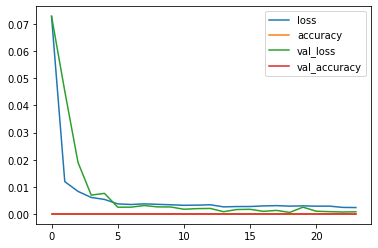

In [ ]:
loss = pd.DataFrame(model.history.history)
loss.plot()

# **Prediction**

In [ ]:
Y_predict = model.predict(X_test)
Y_predict = Y_Scale.inverse_transform(np.array(Y_predict).reshape(len(Y_predict),1))
Y_predict

array([[ 78.1524  ],
       [ 78.06821 ],
       [ 76.43323 ],
       [ 77.536736],
       [ 76.13343 ],
       [ 75.16269 ],
       [ 71.62987 ],
       [ 71.707375],
       [ 70.551384],
       [ 68.047935],
       [ 66.21727 ],
       [ 70.43129 ],
       [ 71.62836 ],
       [ 72.06776 ],
       [ 71.59183 ],
       [ 69.61471 ],
       [ 66.020966],
       [ 67.91614 ],
       [ 67.222916],
       [ 63.084694],
       [ 64.78928 ],
       [ 60.681534],
       [ 60.583847],
       [ 59.48458 ],
       [ 60.678185],
       [ 59.146828],
       [ 54.489395],
       [ 58.883297],
       [ 61.37364 ],
       [ 61.485313],
       [ 61.51606 ],
       [ 61.70202 ],
       [ 62.861435],
       [ 59.937634],
       [ 59.097713],
       [ 59.479664],
       [ 62.381104],
       [ 64.41521 ],
       [ 65.22996 ],
       [ 65.7013  ],
       [ 68.609215],
       [ 68.83684 ],
       [ 69.320496],
       [ 68.536896],
       [ 67.87303 ],
       [ 66.19889 ],
       [ 66.908264],
       [ 67.9

# **Evaluating the Model**

In [ ]:
train_loss = model.evaluate(X_train,Y_train,batch_size = 1)
test_loss = model.evaluate(X_test,Y_test,batch_size = 1)
print("Training loss and Testing loss are",np.around(train_loss[0],4),"and",np.around(test_loss[0],4),"respectively")

313/313 [==============================] - 1s 3ms/step - loss: 0.0194 - accuracy: 0.0032
Training loss and Testing loss are 0.0003 and 0.0194 respectively


In [ ]:
rmse = np.sqrt(np.mean(np.power((Y_test - Y_predict),2)))
print("Root Mean Square Error = ",round(rmse,5))

Root Mean Square Error =  101.30022


In [ ]:
rmse1 = metrics.mean_squared_error(Y_test,Y_predict)
print("Root Mean Square Error = ",round(np.sqrt(rmse1),5))

Root Mean Square Error =  101.30022


In [ ]:
X_test = X_Scale.inverse_transform(np.array(X_test).reshape(len(X_test),len(columns)))
Y_train = Y_Scale.inverse_transform(np.array(Y_train).reshape(len(Y_train),1))
Y_test = Y_Scale.inverse_transform(np.array(Y_test).reshape(len(Y_test),1))

## **Plotting the Prediction v/s Testing:**

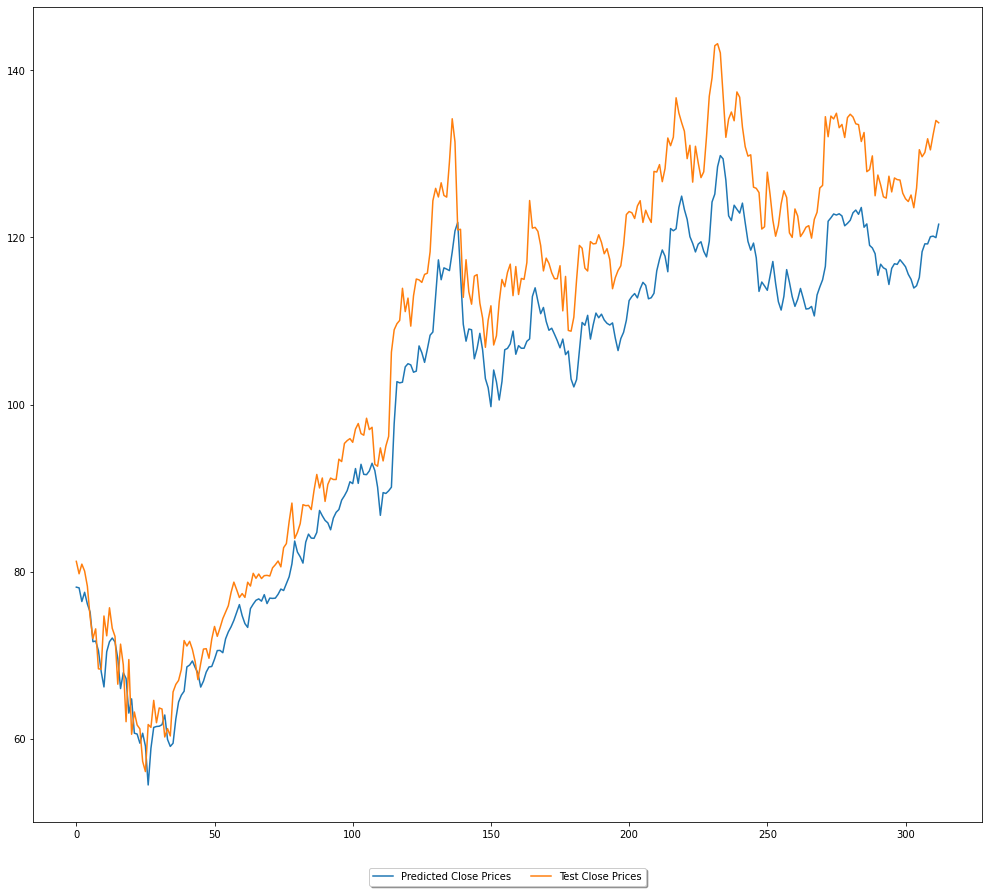

In [ ]:
plt.figure(figsize = (17,15))
plt.plot(Y_predict,label = "Predicted Close Prices")
plt.plot([row[0] for row in Y_test],label = "Test Close Prices")
plt.legend(loc = "upper center",bbox_to_anchor = (0.5,-0.05),fancybox = True,shadow = True,ncol = 2)
plt.show()

# **Saving the model weights:**

In [ ]:
json_model = model.to_json()
with open('Stock_Price_model.json','w') as json_file:
  json_file.write(json_model)

In [ ]:
model.save('Stock_Price_Prediction.hdf5')